<a href="https://colab.research.google.com/github/Apurva-tech/Credit-Card-Fraud-Detection-Dataset-/blob/master/Credit_card_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CreditCard/creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


df.info()

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler

In [9]:
df['Class'].unique()

array([0, 1])

In [0]:
df.dropna(inplace =True)

In [11]:
df['Class'].unique()

array([0, 1])

## **Exploratory Data Analysis :**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


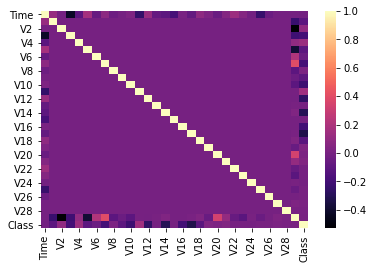

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
sns.heatmap(correlation,cmap='magma',linecolor='white')

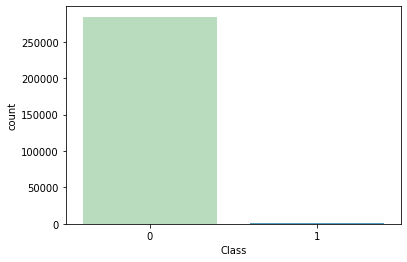

In [13]:
sns.countplot(x='Class',data=df,palette='GnBu')

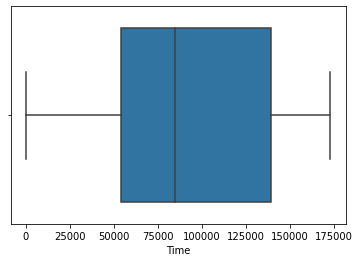

In [14]:
sns.boxplot(x=df['Time'])

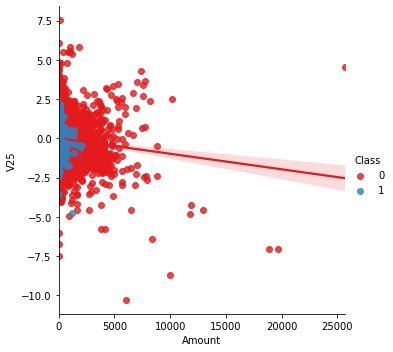

In [15]:
sns.lmplot(x='Amount',y='V25', data= df, hue= 'Class',palette= 'Set1')

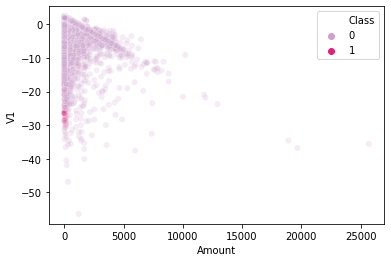

In [16]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='Amount',y='V1',data= df,hue='Class',palette='PuRd',alpha =0.2)

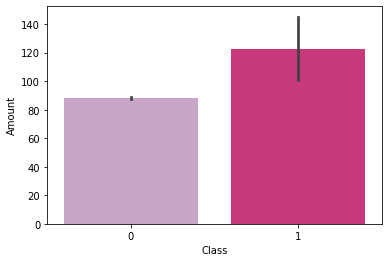

In [17]:
sns.barplot(x='Class',y='Amount',data=df,palette='PuRd')

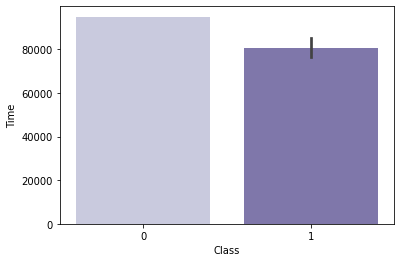

In [18]:
sns.barplot(x='Class',y='Time',data=df,palette='Purples')

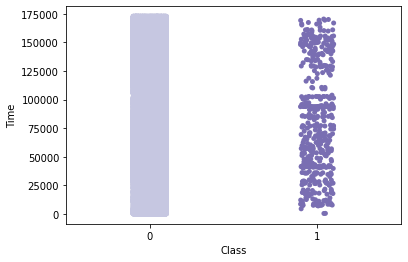

In [19]:
sns.stripplot(x="Class", y="Time", data=df , palette= "Purples")

In [0]:
import numpy as np
from sklearn.decomposition import PCA
X = df.drop(columns='Class')
y = df['Class']

'''pca = PCA(n_components=2)
pca.fit_transform(X)'''

In [21]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [22]:
df.shape

(284807, 31)

The data is highly imbalanced. Hence,we train our model before and after resampling .

# Imbalanced Data : 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 0.4628655 , -0.76417848, -0.58517942, ..., -0.05427856,
         0.47278134,  0.27637606],
       [ 0.99884641, -0.43199832,  0.8362486 , ..., -0.21155863,
        -0.17561255, -0.20845219],
       [-1.06243719, -0.5473776 ,  0.36358059, ..., -0.1751781 ,
         0.27717173, -0.30005801],
       ...,
       [-0.31423311, -0.07216301,  0.59345235, ..., -0.29402614,
        -0.59027941, -0.32887389],
       [-0.1428877 , -1.49506753,  1.40403542, ...,  1.21908694,
         1.01135271, -0.34027614],
       [-0.38613248,  0.62850772, -0.46466388, ...,  0.00552523,
         0.11653329,  0.09409522]])

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
clf.score(X_test,y_test)

0.9990256576810653

In [27]:
clf.score(X_train,y_train)

0.998987617331055

In [28]:
 from sklearn.metrics import classification_report
 target_names = ['not_fraud', 'fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00    113732
       fraud       0.73      0.67      0.70       191

    accuracy                           1.00    113923
   macro avg       0.86      0.83      0.85    113923
weighted avg       1.00      1.00      1.00    113923



In [29]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

0.033652928385943554

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Test accuracy",dtc.score(X_test,y_test))
print("Train accuracy",dtc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_test,y_pred, target_names=target_names))

Test accuracy 0.9991222141270858
Train accuracy 1.0
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00    113732
       fraud       0.71      0.80      0.75       191

    accuracy                           1.00    113923
   macro avg       0.86      0.90      0.88    113923
weighted avg       1.00      1.00      1.00    113923



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc = RandomForestClassifier(max_depth=2, random_state=42,n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Test accuracy",rfc.score(X_test,y_test))
print("Train accuracy",rfc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_test,y_pred, target_names=target_names))

Test accuracy 0.9991748812794606
Train accuracy 0.9991573230963695
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00    113732
       fraud       0.86      0.60      0.71       191

    accuracy                           1.00    113923
   macro avg       0.93      0.80      0.85    113923
weighted avg       1.00      1.00      1.00    113923



In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=42,kernel='sigmoid'))
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Test accuracy",svc.score(X_test,y_test))
print("Train accuracy",svc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_pred,y_test, target_names=target_names))

Test accuracy 0.9986130983207956
Train accuracy 0.9984024250368672
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00    113750
       fraud       0.54      0.60      0.57       173

    accuracy                           1.00    113923
   macro avg       0.77      0.80      0.78    113923
weighted avg       1.00      1.00      1.00    113923



# **Neural Networks**

In [0]:
#Using neural networks 
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras import Sequential

In [34]:
model = Sequential()
model.add(Flatten())
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

earlystop = EarlyStopping(monitor='val_loss',patience=2,verbose=0,mode='min')

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs =10,validation_data = (X_test,y_test),callbacks = [earlystop])


Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

5341/5341 [==============================] - 10s 2ms/step - loss: 0.1994 - accuracy: 0.9982 - val_loss: 0.0415 - val_accuracy: 0.9983
Epoch 2/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0223 - accuracy: 0.9982 - val_loss: 0.0138 - val_accuracy: 0.9983
Epoch 3/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0125 - val_accuracy: 0.9983
Epoch 4/10
5341/5341 [==============================] - 10s 2ms/step - lo

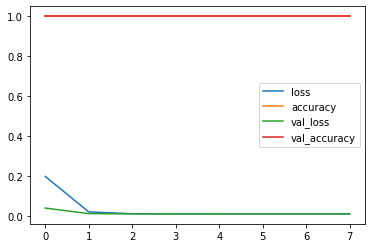

In [35]:
loss = pd.DataFrame(model.history.history)
loss.plot()

# Let's try after resampling data 
# Oversampling the data : 



In [36]:
#Since the data is imbalanced ,Resampling :
 
#Oversampling 
 
from sklearn.utils import resample

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [37]:

# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

rfc = LogisticRegression()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Test accuracy",rfc.score(X_test,y_test))
print("Train accuracy",rfc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_test,y_pred, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test accuracy 0.9677818038819135
Train accuracy 0.9500246195690403
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      0.97      0.98     71070
       fraud       0.05      0.89      0.09       132

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.54     71202
weighted avg       1.00      0.97      0.98     71202



# **Undersampling the data:**

In [38]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

rfc = RandomForestClassifier(max_depth=2, random_state=42,n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Test accuracy",rfc.score(X_test,y_test))
print("Train accuracy",rfc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_test,y_pred, target_names=target_names))

Test accuracy 0.9829780062357799
Train accuracy 0.9361111111111111
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      0.98      0.99     71070
       fraud       0.09      0.86      0.16       132

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



# **Generate synthetic samples using SMOTE**

In [39]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)


rfc = RandomForestClassifier(max_depth=2, random_state=42,n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Test accuracy",rfc.score(X_test,y_test))
print("Train accuracy",rfc.score(X_train,y_train))
print("Classification report :")
print(classification_report(y_test,y_pred, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy 0.98706497008511
Train accuracy 0.9605993106520668
Classification report :
              precision    recall  f1-score   support

   not_fraud       1.00      0.99      0.99     71070
       fraud       0.11      0.85      0.20       132

    accuracy                           0.99     71202
   macro avg       0.56      0.92      0.59     71202
weighted avg       1.00      0.99      0.99     71202

